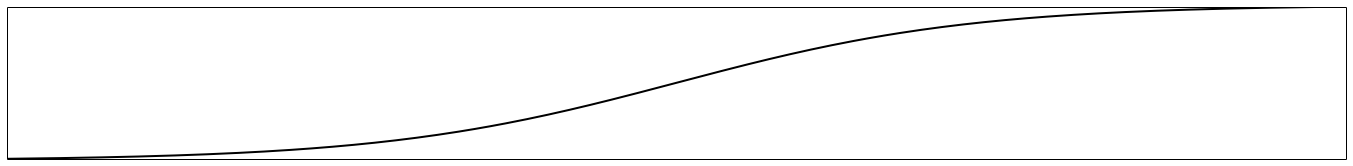

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def twoplayers(a=4,b=5):
    x = np.linspace(0,10,256)
    s = 1/(1+np.exp(-(x-a)/(b+0.1))) # +0.1 to avoid dividing by 0
    sn = 100.0*(s-min(s))/(max(s)-min(s)) # normalize sigmoid to 0-100
    fig = plt.figure(figsize=(24,6))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_xticks([])
    ax1.set_yticks([])
    plt.plot(x,sn,lw=2,color='black')
    plt.xlim(x.min(), x.max())

w=interactive(sigmoid_demo,a=5,b=1)
display(w)

In [2]:
# Imports
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.html.widgets import interactive
from IPython.display import display

In [3]:
# Userful functions

def nWin(n1,n_other,N):
    # return no winnings if any in n_other equals n1. this is an invalid scenario
    if n1 in n_other:
        return 0
        
    nowin = []
    for no in range(len(n_other)):
        # Mark numbers that are closer to n_other than n_1
        nowin = np.hstack((nowin,numCloser(n_other[no],n1,N)))
    nowin = np.unique(nowin)
    #pdb.set_trace()
    return N - len(nowin)

def numCloser(n1,n2,N):
    x1 = np.abs(np.arange(N) - n1)
    x2 = np.abs(np.arange(N) - n2)
    All = np.arange(N)
    return All[x1<=x2]

def closest(nps,N):
    P = len(nps)
    closescore = np.zeros([P,N])
    for p in range(P):
        closescore[p,:] = np.abs(np.arange(N) - nps[p])
    
    closests = np.argmin(closescore,axis=0)
    for n in range(N):
        temp1 = np.min(closescore[:,n])
        if sum(closescore[:,n] == temp1) != 1:
            closests[n] = -1
    
    return closests

# Experiment 1. 2-player game

In [25]:
# Experiment parameters
P = 2 #Number of players
N = 10 #Range of integers in the game

# Calculate the number of numbers controlled by each player for each possible combination of choices
W = np.zeros([N,N,2])
for n1 in range(N):
    for n2 in range(N):
        W[n1,n2,0] = nWin(n1,[n2],N)
        W[n1,n2,1] = nWin(n2,[n1],N)

# Calculate the best number choice for player 1
p1_bestres_eachn = np.zeros(N)
for n in range(N):
    p1_bestres_eachn[n] = N - np.max(np.squeeze(W[n,:,1]))
p1_best = np.argmax(p1_bestres_eachn)
p2_best = np.argmax(np.squeeze(W[p1_best,:,1]))
p2_bestW = W[p1_best,p2_best,1]
p1_bestW = W[p1_best,p2_best,0]

# Display results of strategically played game
print 'P1 chooses' , p1_best , '... Controls' , np.int(p1_bestW), '/', N, 'numbers'
print 'P2 chooses' , p2_best , '... Controls' , np.int(p2_bestW), '/', N, 'numbers'

P1 chooses 4 ... Controls 5 / 10 numbers
P2 chooses 5 ... Controls 5 / 10 numbers


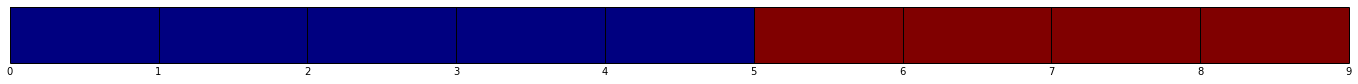

In [27]:
# Plot the numbers controlled by each player
def controlplot(p1_best,p2_best,N):
    ns = np.arange(N)
    closests = closest([p1_best,p2_best],N)
    closests = np.matlib.repmat(closests,2,1)
    y = np.arange(2)

    plt.figure(figsize=(24,1))
    plt.pcolor(ns, y, closests, facecolor=['b','g','r'])
    for n in range(N):
        plt.plot([n,n],[0,1],'k-')

    plt.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')
    plt.xlim([0,N-1])

w=interactive(controlplot,p1_best=p1_best,p2_best=p2_best,N=N)
display(w)
# Need to set limits